Anaylsis:
The analysis of the Capomulin regimen, along with the distribution of data across treatment groups, provides useful insights into how mouse weight correlates with tumor volume. The strong positive correlation and the linear regression model suggest that heavier mice tend to have larger tumors when treated with Capomulin.
The box plots and scatter plots give us a visual understanding of variability, outliers, and patterns in the data, while the regression line quantifies the relationship between weight and tumor volume, providing a statistical tool for predicting tumor size based on body weight.
Overall, these visualizations and analyses help understand the drug’s effect, the characteristics of the dataset, and potential areas for further investigation, such as examining gender-based differences or the influence of weight on treatment outcomes.


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

# Paths to your data files
mouse_metadata_path = "/Users/christinaland/Downloads/Starter_Code-9/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "/Users/christinaland/Downloads/Starter_Code-9/Pymaceuticals/data/Study_results.csv"

# Read the CSV files into DataFrames
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Merge the data on 'Mouse ID'
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Specify the desired column order
desired_column_order = [
    'Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
    'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'
]

# Reorganize the columns
data_merged_col = merged_data[desired_column_order]

# Sort by 'Timepoint' in ascending order
data_merged_col_sorted = data_merged_col.sort_values(by="Timepoint")

# Display the sorted data
print(data_merged_col_sorted.head())


     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        k403          0                45.0                 0     Ramicane   
1883     z969          0                45.0                 0     Naftisol   
1873     z795          0                45.0                 0     Naftisol   
40       g791          0                45.0                 0     Ramicane   
791      e476          0                45.0                 0    Infubinol   

         Sex  Age_months  Weight (g)  
0       Male          21          16  
1883    Male           9          30  
1873  Female          13          29  
40      Male          11          16  
791     Male          23          26  


In [30]:
# number of mice
mouse_sum = data_merged_col["Mouse ID"].nunique()
print(mouse_sum)

249


In [57]:
#Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_mice = data_merged_col[data_merged_col.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

duplicate_mice_ids = duplicate_mice["Mouse ID"].unique()


print(duplicate_mice_ids, duplicate_mice_ids.dtype)

['g989'] object


In [32]:
duplicates_df = data_merged_col[data_merged_cleaned.duplicated(subset=['Mouse ID', 'Timepoint'])]
print(duplicates)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [59]:
import pandas as pd




data_merged = pd.merge(mouse_metadata, study_results, on="Mouse ID")


duplicates = data_merged[data_merged.duplicated(subset=["Mouse ID", "Timepoint"], keep="first")]



data_cleaned = data_merged.drop_duplicates(subset="Mouse ID", keep="first")





print("\nCleaned DataFrame:")
print(data_cleaned.head())





Cleaned DataFrame:
   Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0      k403     Ramicane    Male          21          16          0   
10     s185    Capomulin  Female           3          17          0   
20     x401    Capomulin  Female          16          15          0   
30     m601    Capomulin    Male          22          17          0   
40     g791     Ramicane    Male          11          16          0   

    Tumor Volume (mm3)  Metastatic Sites  
0                 45.0                 0  
10                45.0                 0  
20                45.0                 0  
30                45.0                 0  
40                45.0                 0  


In [52]:
# Checking the number of unique mice in the cleaned DataFrame
unique_mice_count = data_cleaned['Mouse ID'].nunique()
print(unique_mice_count)


249


In [56]:
# Group the merged data by 'Drug Regimen'
grouped_data = data_merged.groupby('Drug Regimen')['Tumor Volume (mm3)']

# Calculate summary statistics
mean_tumor_volume = grouped_data.mean()
median_tumor_volume = grouped_data.median()
variance_tumor_volume = grouped_data.var()
std_dev_tumor_volume = grouped_data.std()
sem_tumor_volume = grouped_data.sem()

# Create a summary DataFrame by combining all the calculated statistics
summary_stats = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Tumor Volume Variance': variance_tumor_volume,
    'Tumor Volume Std. Dev.': std_dev_tumor_volume,
    'Tumor Volume Std. Err.': sem_tumor_volume
})

# Display the summary statistics table
print(summary_stats)


              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.322552            50.854632              42.351070   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume 

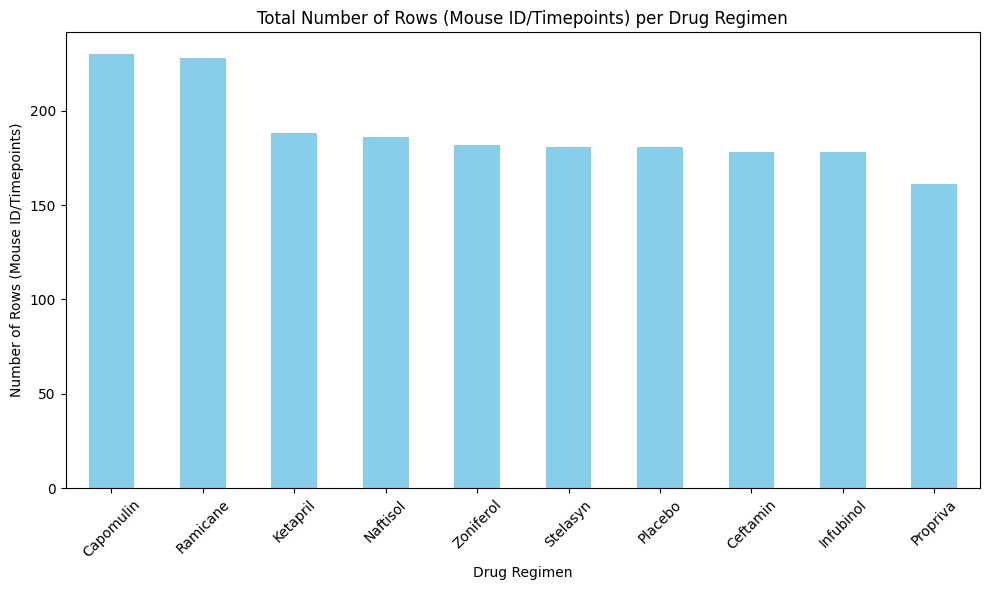

In [67]:
import pandas as pd
# Count the number of rows (Mouse ID/Timepoints) for each drug regimen
rows_per_drug_regimen = data_merged.groupby('Drug Regimen').size()

# Sort the values in descending order
rows_per_drug_regimen = rows_per_drug_regimen.sort_values(ascending=False)

# Create the bar plot using Pandas plot function
rows_per_drug_regimen.plot(kind='bar', figsize=(10, 6), color='skyblue')

# Adding labels and title
plt.title('Total Number of Rows (Mouse ID/Timepoints) per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID/Timepoints)')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Ensure the labels fit in the plot
plt.show()


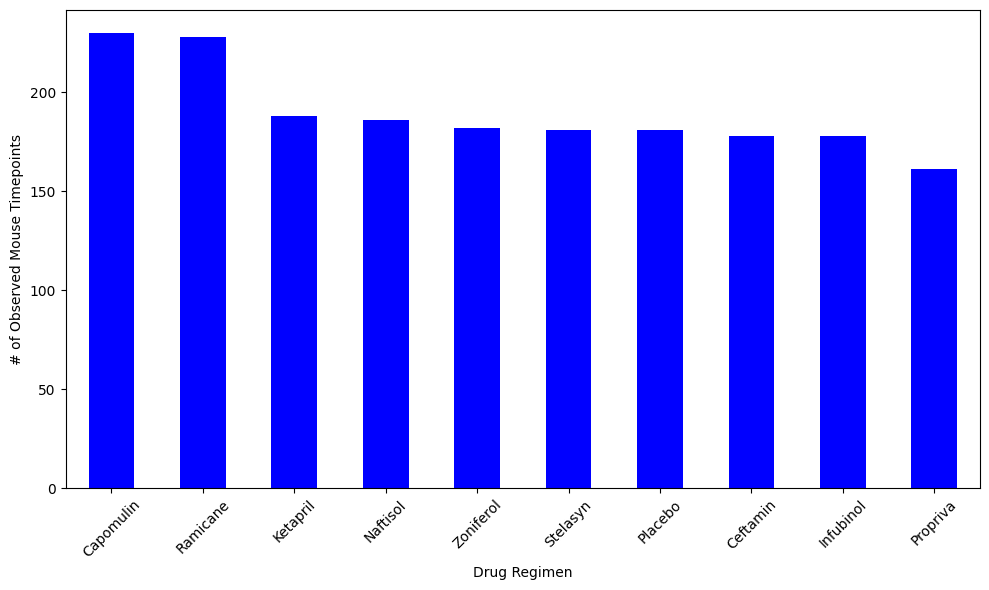

In [ ]:
import matplotlib.pyplot as plt
# Count the number of rows (Mouse ID/Timepoints) for each drug regimen
rows_per_drug_regimen = data_merged.groupby('Drug Regimen').size()

# Sort the values in descending order
rows_per_drug_regimen = rows_per_drug_regimen.sort_values(ascending=False)

# Generate the bar plot using Pandas
rows_per_drug_regimen.plot(kind='bar', color='blue', figsize=(10, 6))



plt.ylabel('# of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')
plt.xticks(rotation=45)
plt.tight_layout()  # Ensure the labels fit in the plot
plt.show()


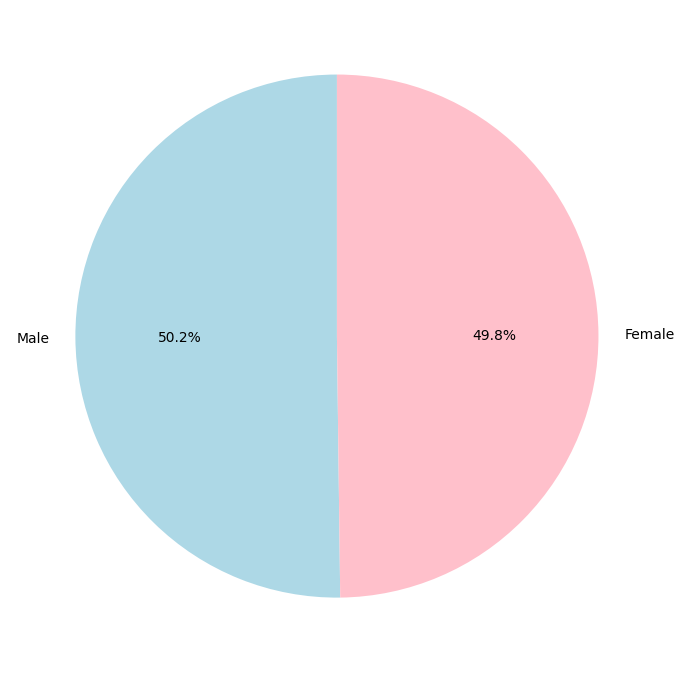

In [74]:
import pandas as pd
 
 #Get the unique mice and their gender
unique_mice_gender = data_merged.drop_duplicates(subset='Mouse ID')['Sex']

# Count the number of unique female and male mice
gender_counts = unique_mice_gender.value_counts()

# Create a pie chart using Pandas
gender_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(7, 7), startangle=90, colors=['lightblue', 'pink'])



# Show the plot
plt.ylabel('')  # Hide the y-label (it is redundant for a pie chart)
plt.tight_layout()  # Ensure the labels fit within the plot space
plt.show()


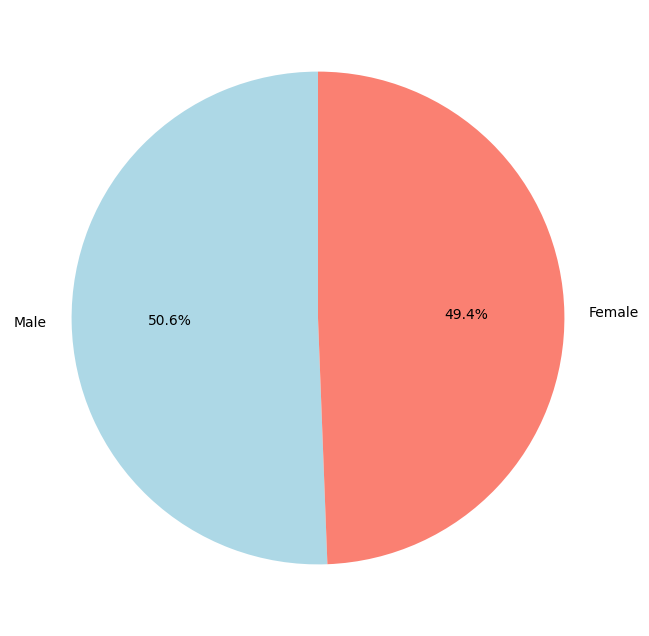

In [ ]:

import matplotlib.pyplot as plt

# Assuming 'data_merged' is already created and merged from the previous steps

# Count the number of female and male mice in the study
gender_count = data_merged['Sex'].value_counts()

# Create the pie chart using Matplotlib's pyplot methods
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])

# Show the plot
plt.show()


In [75]:
import pandas as pd

# Assuming 'data_merged' is already loaded and merged with all columns.

# Group by Drug Regimen and get the final tumor volume for each mouse
last_timepoints = data_merged.groupby('Mouse ID')['Timepoint'].max()
last_timepoints_df = pd.merge(last_timepoints, data_merged, on=['Mouse ID', 'Timepoint'], how='left')

# Filter for the treatment regimens of interest
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = last_timepoints_df[last_timepoints_df['Drug Regimen'].isin(treatment_regimens)]

# Create a dictionary to hold potential outliers for each treatment regimen
outliers = {}

# Loop through each treatment regimen to find outliers
for regimen in treatment_regimens:
    # Filter the data for the current regimen
    regimen_data = filtered_data[filtered_data['Drug Regimen'] == regimen]['Tumor Volume (mm3)']
    
    # Calculate the quartiles and IQR
    Q1 = regimen_data.quantile(0.25)
    Q3 = regimen_data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify potential outliers
    potential_outliers = regimen_data[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    
    # Store the outliers for this regimen
    outliers[regimen] = potential_outliers

# Display the potential outliers for each regimen
for regimen, outlier_data in outliers.items():
    print(f"{regimen}'s potential outliers: {outlier_data}\n")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



/var/folders/7n/_s29cmps2y9_x1zjhtgywrmc0000gn/T/ipykernel_58760/2650790990.py:49: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_volumes, labels=treatment_regimens, patch_artist=True)


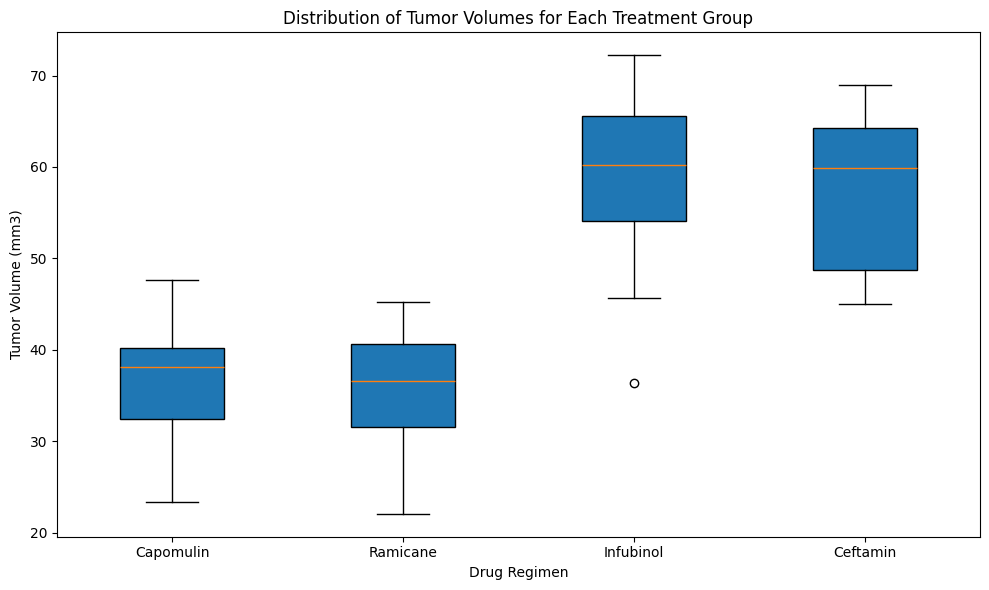

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data_merged' is already loaded and merged with all columns.

# Group by Drug Regimen and get the final tumor volume for each mouse
last_timepoints = data_merged.groupby('Mouse ID')['Timepoint'].max()
last_timepoints_df = pd.merge(last_timepoints, data_merged, on=['Mouse ID', 'Timepoint'], how='left')

# Filter for the treatment regimens of interest
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = last_timepoints_df[last_timepoints_df['Drug Regimen'].isin(treatment_regimens)]

# Create a dictionary to hold potential outliers for each treatment regimen
outliers = {}

# Create a list to hold tumor volume data for each regimen (for the box plot)
tumor_volumes = []

# Loop through each treatment regimen to find outliers and prepare data for the box plot
for regimen in treatment_regimens:
    # Filter the data for the current regimen
    regimen_data = filtered_data[filtered_data['Drug Regimen'] == regimen]['Tumor Volume (mm3)']
    
    # Calculate the quartiles and IQR
    Q1 = regimen_data.quantile(0.25)
    Q3 = regimen_data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify potential outliers
    potential_outliers = regimen_data[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    
    # Store the outliers for this regimen
    outliers[regimen] = potential_outliers
    
    # Append tumor volume data for box plot
    tumor_volumes.append(regimen_data)

# Display the potential outliers for each regimen
for regimen, outlier_data in outliers.items():
    print(f"{regimen}'s potential outliers: {outlier_data}\n")

# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volumes, labels=treatment_regimens, patch_artist=True)

# Adding labels and title
plt.title('Distribution of Tumor Volumes for Each Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.tight_layout()
plt.show()


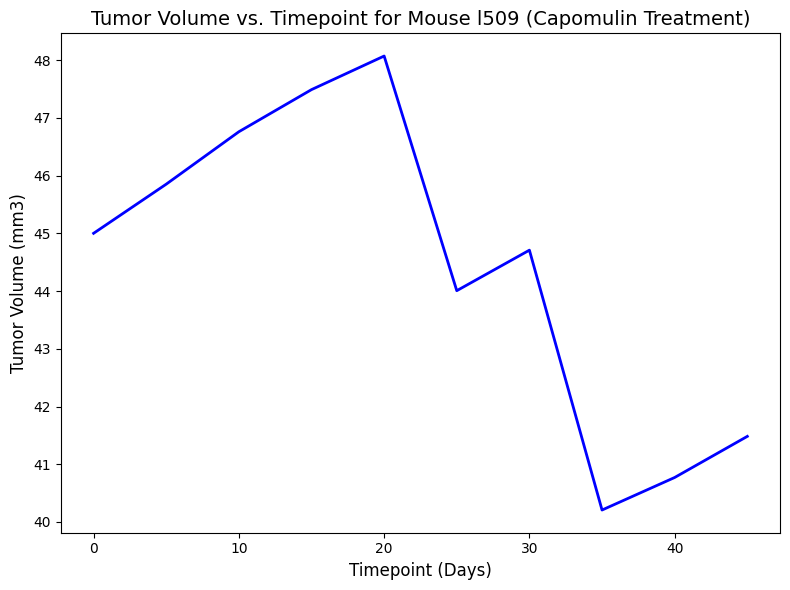

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data_merged' is already loaded and merged with all columns.

# Filter the data for a single mouse treated with Capomulin
mouse_id = 'l509'  # Example Mouse ID for a mouse treated with Capomulin
capomulin_data = data_merged[(data_merged['Drug Regimen'] == 'Capomulin') & (data_merged['Mouse ID'] == mouse_id)]

# Create the plot of Tumor Volume vs. Timepoint (line plot without grid lines and points)
plt.figure(figsize=(8, 6))

# Plot with a solid line, but no points (no markers)
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], color='b', linestyle='-', marker='', linewidth=2)

# Add titles and labels
plt.title(f'Tumor Volume vs. Timepoint for Mouse {mouse_id} (Capomulin Treatment)', fontsize=14)
plt.xlabel('Timepoint (Days)', fontsize=12)
plt.ylabel('Tumor Volume (mm3)', fontsize=12)

# Remove the grid
plt.grid(False)

# Display the plot
plt.tight_layout()
plt.show()


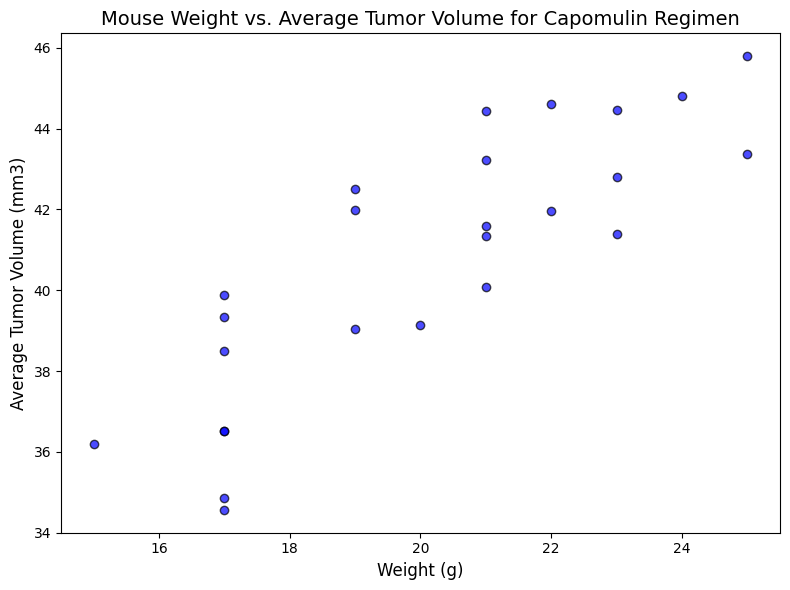

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data_merged' is already loaded and merged with all columns.

# Filter the data for the Capomulin regimen
capomulin_data = data_merged[data_merged['Drug Regimen'] == 'Capomulin']

# Group by 'Mouse ID' and calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume with the mouse weights (using 'Mouse ID')
mouse_weights = capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates()
merged_data = pd.merge(average_tumor_volume, mouse_weights, on='Mouse ID')

# Create a scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='b', edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen', fontsize=14)
plt.xlabel('Weight (g)', fontsize=12)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


Pearson correlation coefficient: 0.8419363424694721


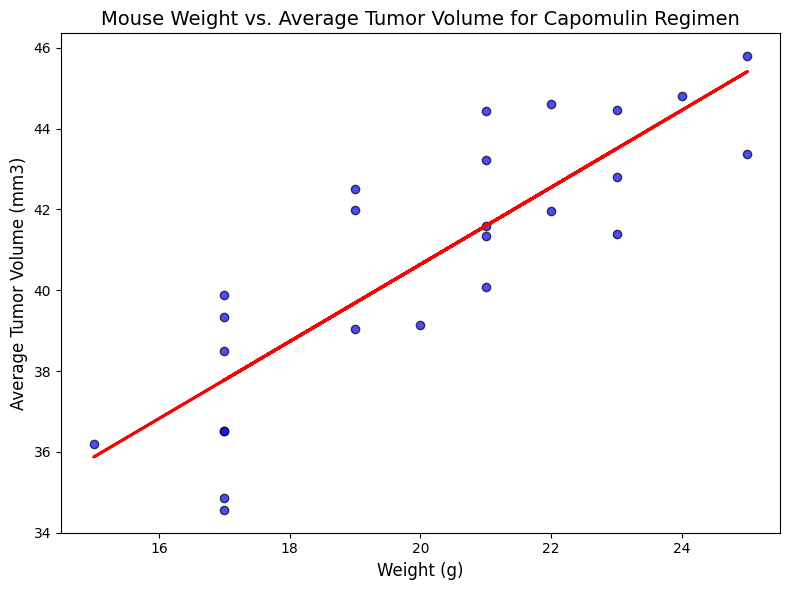

Linear Regression Model: y = 0.95x + 21.55
R-squared: 0.71


In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Assuming 'data_merged' is already loaded and merged with all columns.

# Filter the data for the Capomulin regimen
capomulin_data = data_merged[data_merged['Drug Regimen'] == 'Capomulin']

# Group by 'Mouse ID' and calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume with the mouse weights (using 'Mouse ID')
mouse_weights = capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates()
merged_data = pd.merge(average_tumor_volume, mouse_weights, on='Mouse ID')

# Calculate the Pearson correlation coefficient
correlation = merged_data['Weight (g)'].corr(merged_data['Tumor Volume (mm3)'])
print(f"Pearson correlation coefficient: {correlation}")

# Perform linear regression to get the slope and intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

# Create the regression line
regression_line = slope * merged_data['Weight (g)'] + intercept

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='b', edgecolor='black', alpha=0.7)

# Plot the regression line
plt.plot(merged_data['Weight (g)'], regression_line, color='r', linewidth=2)

# Add titles and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen', fontsize=14)
plt.xlabel('Weight (g)', fontsize=12)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

# Print the linear regression results
print(f"Linear Regression Model: y = {slope:.2f}x + {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}")
